<a href="https://colab.research.google.com/github/mertgokcer/GoruntuIsleme/blob/main/MakinaOgrenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/DryBeanDataset/Dry_Bean_Dataset.xlsx")
print(df.head())


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [2]:
import numpy as np

# Kopyasını alıyoruz orijinali bozulmasın diye
df_missing = df.copy()

# Sayısal sütunlardan seçim yapmak için sadece float/int olanları alalım
numeric_cols = df_missing.select_dtypes(include=[np.number]).columns.tolist()

# Rastgele 3 farklı sütun seçiyoruz
np.random.seed(42)  # Tekrarlanabilirlik için
selected_cols = np.random.choice(numeric_cols, size=3, replace=False)

# İlk 2 sütuna %5 oranında missing value
for col in selected_cols[:2]:
    n = int(len(df_missing) * 0.05)
    idx = np.random.choice(df_missing.index, size=n, replace=False)
    df_missing.loc[idx, col] = np.nan

# 3. sütuna %35 oranında missing value
col_heavy = selected_cols[2]
n_heavy = int(len(df_missing) * 0.35)
idx_heavy = np.random.choice(df_missing.index, size=n_heavy, replace=False)
df_missing.loc[idx_heavy, col_heavy] = np.nan

# Hangi sütunlara ne kadar NaN eklendiğini görelim
for col in selected_cols:
    print(f"{col} sütununda toplam {df_missing[col].isna().sum()} eksik değer var.")

# İsteğe bağlı: ilk birkaç satırı göster
print(df_missing[selected_cols].head(10))


Area sütununda toplam 680 eksik değer var.
Perimeter sütununda toplam 680 eksik değer var.
Eccentricity sütununda toplam 4763 eksik değer var.
      Area  Perimeter  Eccentricity
0  28395.0    610.291      0.549812
1  28734.0    638.018           NaN
2  29380.0    624.110      0.562727
3  30008.0    645.884      0.498616
4  30140.0    620.134           NaN
5  30279.0    634.927           NaN
6  30477.0    670.033      0.489478
7  30519.0    629.727      0.513760
8      NaN    635.681           NaN
9  30834.0    631.934           NaN


In [3]:
# Tüm sütunlardaki eksik değer sayılarını görüntüleyelim
print(df_missing.isnull().sum())

# Sadece eksik veri içeren sütunları göster
missing_summary = df_missing.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
print(missing_summary)


Area                680
Perimeter           680
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity       4763
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64
Area             680
Perimeter        680
Eccentricity    4763
dtype: int64


In [7]:
# Hangi sütunlara %5 eksik veri eklendiğini hatırlayalım
col_5_1, col_5_2 = selected_cols[:2]

# Ortalama ile doldur (örnek: ilk sütun)
df_missing[col_5_1].fillna(df_missing[col_5_1].mean(), inplace=True)

# Medyan ile doldur (örnek: ikinci sütun)
df_missing[col_5_2].fillna(df_missing[col_5_2].median(), inplace=True)

# Kontrol: Eksik değer kaldı mı?
print(f"{col_5_1} sütunundaki eksik değer sayısı: {df_missing[col_5_1].isna().sum()}")
print(f"{col_5_2} sütunundaki eksik değer sayısı: {df_missing[col_5_2].isna().sum()}")


Area sütunundaki eksik değer sayısı: 0
Perimeter sütunundaki eksik değer sayısı: 0


<ipython-input-7-8b9bf42c0953>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing[col_5_1].fillna(df_missing[col_5_1].mean(), inplace=True)
<ipython-input-7-8b9bf42c0953>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [8]:
# %35 eksik veri olan sütun
col_35 = selected_cols[2]

# Bu sütunu tamamen veri setinden çıkarıyoruz
df_cleaned = df_missing.drop(columns=[col_35])

# Kontrol edelim: Sütun hâlâ var mı?
print(f"{col_35} sütunu veri setinde mi? {col_35 in df_cleaned.columns}")


Eccentricity sütunu veri setinde mi? False


In [9]:
# Çalışacağımız veri: df_cleaned (eksik ve sorunlu sütunlardan arındırılmış hali)
df_outlier = df_cleaned.copy()

numeric_cols = df_outlier.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize: Aykırı değerleri sınırlarla değiştir
    df_outlier[col] = np.where(df_outlier[col] < lower_bound, lower_bound,
                               np.where(df_outlier[col] > upper_bound, upper_bound, df_outlier[col]))

print("IQR yöntemi ile aykırı değerler sınırlarla değiştirildi.")


IQR yöntemi ile aykırı değerler sınırlarla değiştirildi.


In [10]:
from sklearn.preprocessing import StandardScaler

# Sadece sayısal değişkenleri ölçekliyoruz
numeric_cols = df_outlier.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_scaled = df_outlier.copy()

df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# İlk 5 satırı gösterelim
print(df_scaled.head())


       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -1.215050  -1.288604        -1.374254        -0.754155     -1.593134   
1 -1.196137  -1.135468        -1.469528        -0.483939     -2.007702   
2 -1.160096  -1.212282        -1.316393        -0.691764     -1.541139   
3 -1.125060  -1.092024        -1.344628        -0.490595     -1.773991   
4 -1.117696  -1.234241        -1.453058        -0.253460     -2.159512   

   ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
0   -1.154709      -1.253256  0.288191  0.391994   1.443596     1.846568   
1   -1.130895      -1.229363  0.704930 -0.690705   0.230145     2.311820   
2   -1.103903      -1.184218  0.583210  0.588587   1.269635     1.772042   
3   -1.050022      -1.140804  0.678177 -2.321377   0.519054     2.089993   
4   -1.066020      -1.131737  0.478946  0.961891   1.902527     2.311820   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.693778      2.402173  

In [13]:
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunlar: veri türü object olanlar
categorical_cols = df_scaled.select_dtypes(include=['object']).columns

# Label Encoding sadece "Class" gibi tek kategorik sütunda yapılacak
le = LabelEncoder()

df_encoded = df_scaled.copy()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("Label Encoding uygulandı:")
print(df_encoded[categorical_cols].head())




Label Encoding uygulandı:
   Class
0      5
1      5
2      5
3      5
4      5


In [16]:
print(df_encoded.columns)


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class_1', 'Class_2', 'Class_3',
       'Class_4', 'Class_5', 'Class_6'],
      dtype='object')


In [17]:
# Özellik sütunları (Area, Perimeter, vb.)
X = df_encoded.drop(columns=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6'])

# Sınıf etiketleri: One-Hot kodlamadan geri çeviriyoruz
y = df_encoded[['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6']].idxmax(axis=1)

# y değerlerini sayısal yapalım (Class_1 → 1, Class_2 → 2, ...)
y = y.apply(lambda x: int(x.split('_')[1]))

# Kontrol edelim
print(X.head())
print(y.head())


       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -1.215050  -1.288604        -1.374254        -0.754155     -1.593134   
1 -1.196137  -1.135468        -1.469528        -0.483939     -2.007702   
2 -1.160096  -1.212282        -1.316393        -0.691764     -1.541139   
3 -1.125060  -1.092024        -1.344628        -0.490595     -1.773991   
4 -1.117696  -1.234241        -1.453058        -0.253460     -2.159512   

   ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
0   -1.154709      -1.253256  0.288191  0.391994   1.443596     1.846568   
1   -1.130895      -1.229363  0.704930 -0.690705   0.230145     2.311820   
2   -1.103903      -1.184218  0.583210  0.588587   1.269635     1.772042   
3   -1.050022      -1.140804  0.678177 -2.321377   0.519054     2.089993   
4   -1.066020      -1.131737  0.478946  0.961891   1.902527     2.311820   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0      0.693778      2.402173      1.9

In [18]:
#  PCA Uygulama
from sklearn.decomposition import PCA

# PCA'yı başlat ve uygula
pca = PCA()
X_pca = pca.fit_transform(X)

# Açıklanan varyans oranlarını çıkar
explained_variance = pca.explained_variance_ratio_

print("Her bileşenin açıklanan varyans oranı:")
for idx, var in enumerate(explained_variance):
    print(f"Bileşen {idx+1}: {var:.4f}")


Her bileşenin açıklanan varyans oranı:
Bileşen 1: 0.5938
Bileşen 2: 0.2304
Bileşen 3: 0.0711
Bileşen 4: 0.0537
Bileşen 5: 0.0301
Bileşen 6: 0.0071
Bileşen 7: 0.0045
Bileşen 8: 0.0040
Bileşen 9: 0.0021
Bileşen 10: 0.0015
Bileşen 11: 0.0011
Bileşen 12: 0.0003
Bileşen 13: 0.0001
Bileşen 14: 0.0000
Bileşen 15: 0.0000


In [19]:
# Ortalama varyans oranı
mean_variance = explained_variance.mean()
print(f"Ortalama açıklanan varyans: {mean_variance:.4f}")

# Ortalama varyans oranından büyük olan bileşenleri seçelim
n_components_selected = sum(explained_variance > mean_variance)
print(f"Seçilecek bileşen sayısı: {n_components_selected}")

# Seçilen bileşen sayısına göre PCA'yi tekrar uygula
pca_final = PCA(n_components=n_components_selected)
X_pca_final = pca_final.fit_transform(X)


Ortalama açıklanan varyans: 0.0667
Seçilecek bileşen sayısı: 3


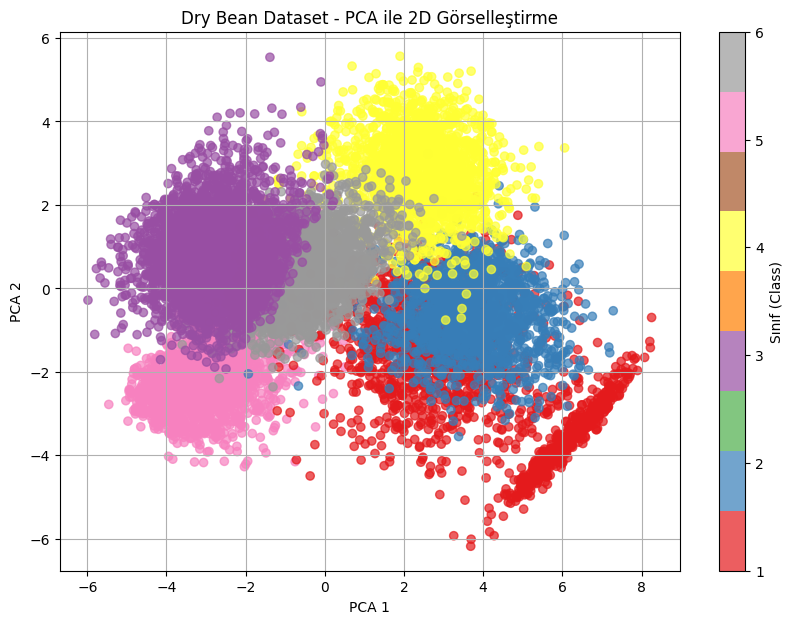

In [20]:
import matplotlib.pyplot as plt

# İlk iki PCA bileşeni
X_pca_2d = X_pca_final[:, :2]

# 2D scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='Set1', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Dry Bean Dataset - PCA ile 2D Görselleştirme')
plt.colorbar(scatter, label='Sınıf (Class)')
plt.grid(True)
plt.show()


In [21]:
# LDA Uygulaması (n_components = 3)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA modeli başlatılıyor
lda = LDA(n_components=3)

# LDA ile boyut indirgeme uygulanıyor
X_lda = lda.fit_transform(X, y)

print(f"LDA sonrası veri şekli: {X_lda.shape}")


LDA sonrası veri şekli: (13611, 3)


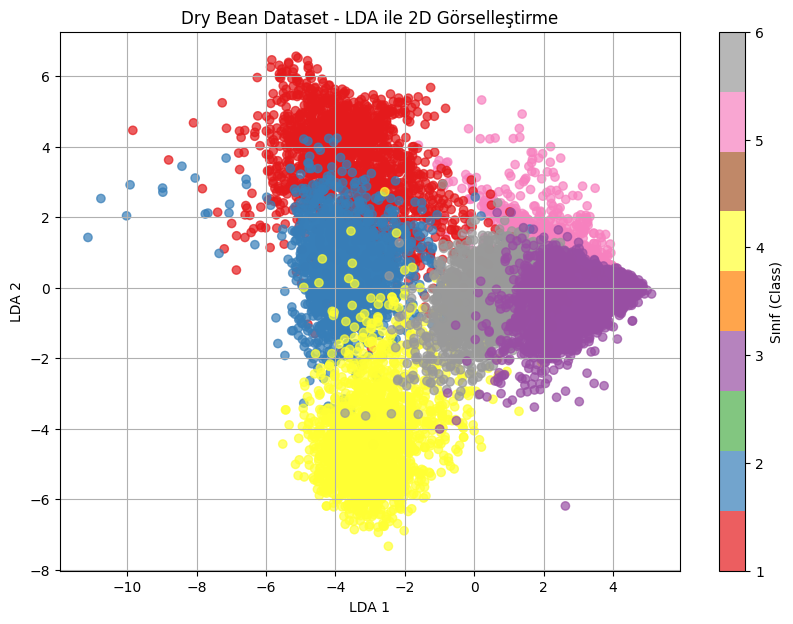

In [22]:
# İlk 2 LDA Bileşeni ile 2D Scatter Plot (Sınıf Ayrımı)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='Set1', alpha=0.7)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('Dry Bean Dataset - LDA ile 2D Görselleştirme')
plt.colorbar(scatter, label='Sınıf (Class)')
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Outer loop için 5-Fold CV (random_state değişecek her seferde)
outer_cv = KFold(n_splits=5, shuffle=True)

# Sonuçları burada toplayacağız
outer_scores = []

# Outer loop (Dış döngü)
for outer_fold, (train_val_idx, test_idx) in enumerate(outer_cv.split(X_lda), 1):
    print(f"\n--- Outer Fold {outer_fold} ---")

    X_train_val, X_test = X_lda[train_val_idx], X_lda[test_idx]
    y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]

    # Inner loop için 3-Fold CV (sabit random_state = 42)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Model ve Hiperparametre grid
    model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=inner_cv,
                               scoring='accuracy',
                               n_jobs=-1)

    # İç döngüde en iyi modeli bul
    grid_search.fit(X_train_val, y_train_val)

    # En iyi model ile dış test verisini değerlendir
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Outer Fold {outer_fold} Test Accuracy: {acc:.4f}")

    outer_scores.append(acc)

# Tüm dış fold sonuçları
print("\n--- Nested CV Sonucu ---")
print(f"Ortalama Accuracy: {np.mean(outer_scores):.4f}")
print(f"Std Deviation: {np.std(outer_scores):.4f}")



--- Outer Fold 1 ---
Outer Fold 1 Test Accuracy: 0.9012

--- Outer Fold 2 ---
Outer Fold 2 Test Accuracy: 0.9137

--- Outer Fold 3 ---
Outer Fold 3 Test Accuracy: 0.9126

--- Outer Fold 4 ---
Outer Fold 4 Test Accuracy: 0.9026

--- Outer Fold 5 ---
Outer Fold 5 Test Accuracy: 0.9181

--- Nested CV Sonucu ---
Ortalama Accuracy: 0.9096
Std Deviation: 0.0066



==== Ham Veri ====
Logistic Regression | Outer Fold 1 Test Accuracy: 0.9346
Logistic Regression | Outer Fold 2 Test Accuracy: 0.9188
Logistic Regression | Outer Fold 3 Test Accuracy: 0.9203
Logistic Regression | Outer Fold 4 Test Accuracy: 0.9265
Logistic Regression | Outer Fold 5 Test Accuracy: 0.9251
Logistic Regression | Ortalama Accuracy: 0.9251 | Std: 0.0056
Logistic Regression | Ortalama Precision: 0.9306 | Std: 0.0041
Logistic Regression | Ortalama Recall: 0.9295 | Std: 0.0052
Logistic Regression | Ortalama F1 Score: 0.9299 | Std: 0.0045



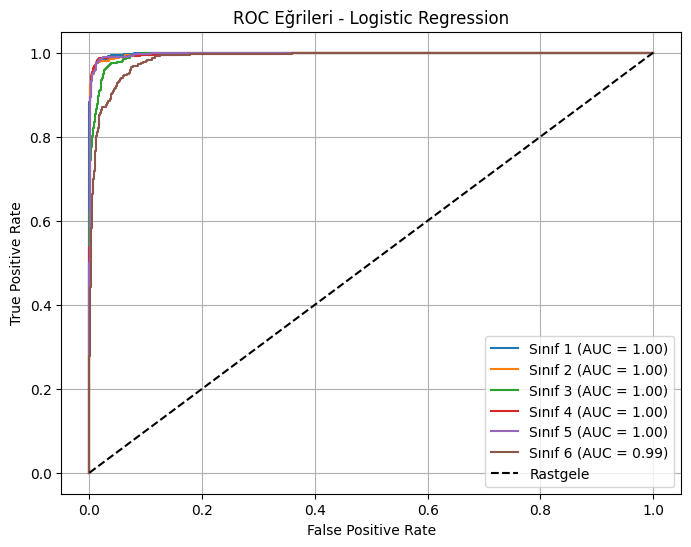

Decision Tree | Outer Fold 1 Test Accuracy: 0.9071
Decision Tree | Outer Fold 2 Test Accuracy: 0.9030
Decision Tree | Outer Fold 3 Test Accuracy: 0.9078
Decision Tree | Outer Fold 4 Test Accuracy: 0.9019
Decision Tree | Outer Fold 5 Test Accuracy: 0.9060
Decision Tree | Ortalama Accuracy: 0.9052 | Std: 0.0023
Decision Tree | Ortalama Precision: 0.9115 | Std: 0.0028
Decision Tree | Ortalama Recall: 0.9087 | Std: 0.0029
Decision Tree | Ortalama F1 Score: 0.9099 | Std: 0.0026



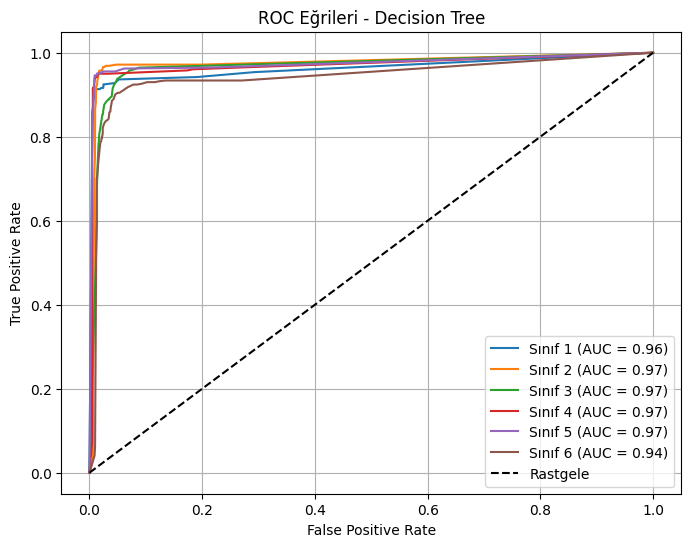

Random Forest | Outer Fold 1 Test Accuracy: 0.9247
Random Forest | Outer Fold 2 Test Accuracy: 0.9129
Random Forest | Outer Fold 3 Test Accuracy: 0.9236
Random Forest | Outer Fold 4 Test Accuracy: 0.9078
Random Forest | Outer Fold 5 Test Accuracy: 0.9335
Random Forest | Ortalama Accuracy: 0.9205 | Std: 0.0091
Random Forest | Ortalama Precision: 0.9257 | Std: 0.0082
Random Forest | Ortalama Recall: 0.9233 | Std: 0.0086
Random Forest | Ortalama F1 Score: 0.9244 | Std: 0.0083



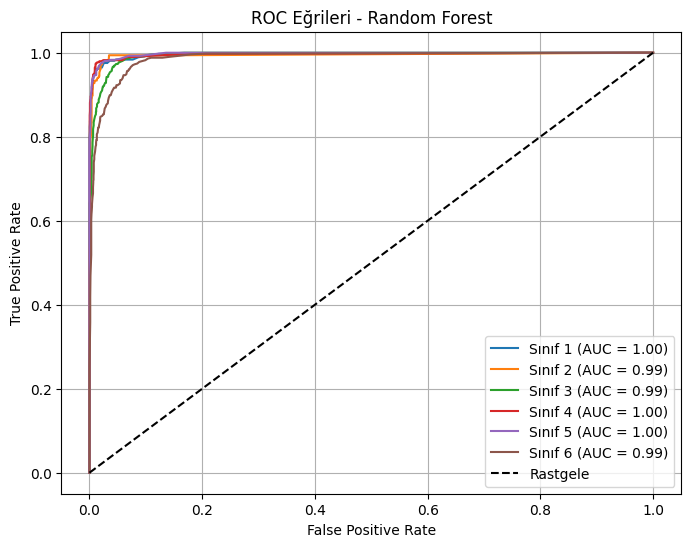

XGBoost | Outer Fold 1 Test Accuracy: 0.9313
XGBoost | Outer Fold 2 Test Accuracy: 0.9265
XGBoost | Outer Fold 3 Test Accuracy: 0.9262
XGBoost | Outer Fold 4 Test Accuracy: 0.9280
XGBoost | Outer Fold 5 Test Accuracy: 0.9199
XGBoost | Ortalama Accuracy: 0.9264 | Std: 0.0037
XGBoost | Ortalama Precision: 0.9334 | Std: 0.0031
XGBoost | Ortalama Recall: 0.9300 | Std: 0.0036
XGBoost | Ortalama F1 Score: 0.9316 | Std: 0.0033



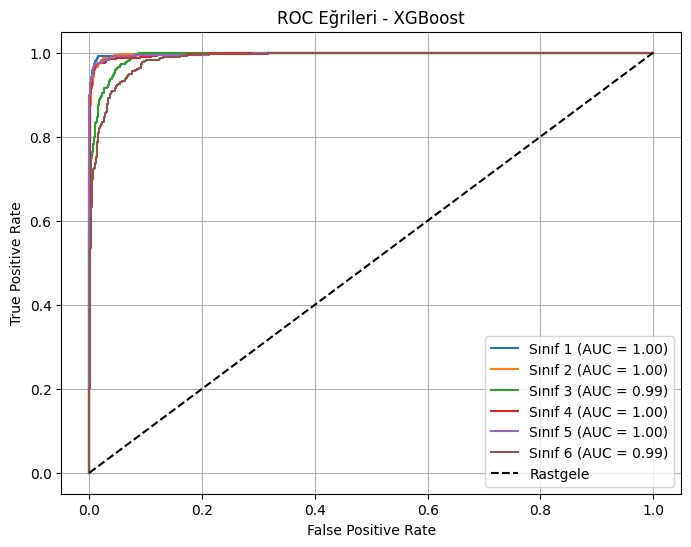

Naive Bayes | Outer Fold 1 Test Accuracy: 0.8902
Naive Bayes | Outer Fold 2 Test Accuracy: 0.8968
Naive Bayes | Outer Fold 3 Test Accuracy: 0.8902
Naive Bayes | Outer Fold 4 Test Accuracy: 0.8898
Naive Bayes | Outer Fold 5 Test Accuracy: 0.8920
Naive Bayes | Ortalama Accuracy: 0.8918 | Std: 0.0026
Naive Bayes | Ortalama Precision: 0.8922 | Std: 0.0037
Naive Bayes | Ortalama Recall: 0.8937 | Std: 0.0041
Naive Bayes | Ortalama F1 Score: 0.8921 | Std: 0.0039



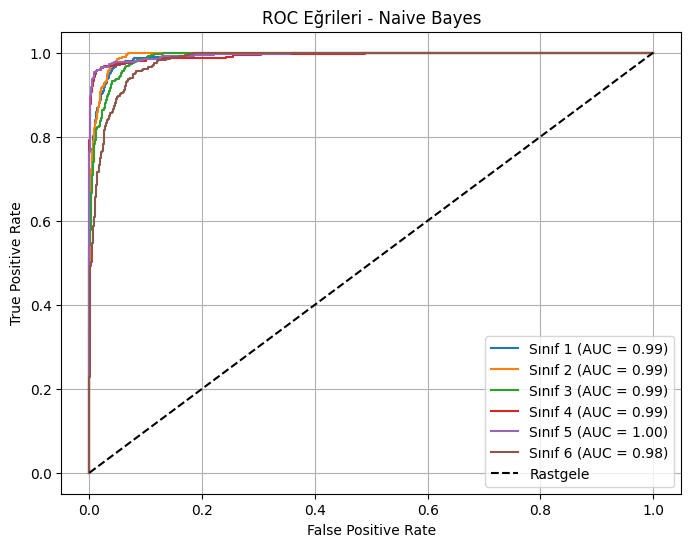


==== PCA Verisi ====
Logistic Regression | Outer Fold 1 Test Accuracy: 0.8652
Logistic Regression | Outer Fold 2 Test Accuracy: 0.8718
Logistic Regression | Outer Fold 3 Test Accuracy: 0.8637
Logistic Regression | Outer Fold 4 Test Accuracy: 0.8795
Logistic Regression | Outer Fold 5 Test Accuracy: 0.8740
Logistic Regression | Ortalama Accuracy: 0.8708 | Std: 0.0058
Logistic Regression | Ortalama Precision: 0.8623 | Std: 0.0067
Logistic Regression | Ortalama Recall: 0.8614 | Std: 0.0065
Logistic Regression | Ortalama F1 Score: 0.8616 | Std: 0.0066



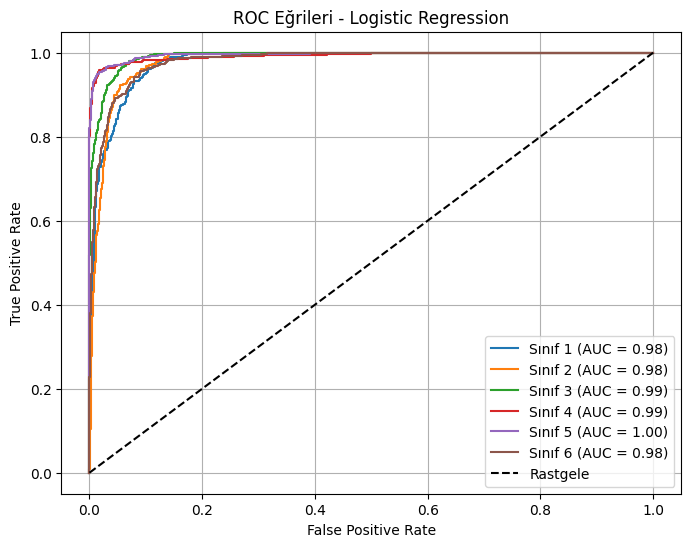

Decision Tree | Outer Fold 1 Test Accuracy: 0.8682
Decision Tree | Outer Fold 2 Test Accuracy: 0.8626
Decision Tree | Outer Fold 3 Test Accuracy: 0.8567
Decision Tree | Outer Fold 4 Test Accuracy: 0.8494
Decision Tree | Outer Fold 5 Test Accuracy: 0.8648
Decision Tree | Ortalama Accuracy: 0.8603 | Std: 0.0066
Decision Tree | Ortalama Precision: 0.8573 | Std: 0.0065
Decision Tree | Ortalama Recall: 0.8553 | Std: 0.0074
Decision Tree | Ortalama F1 Score: 0.8553 | Std: 0.0068



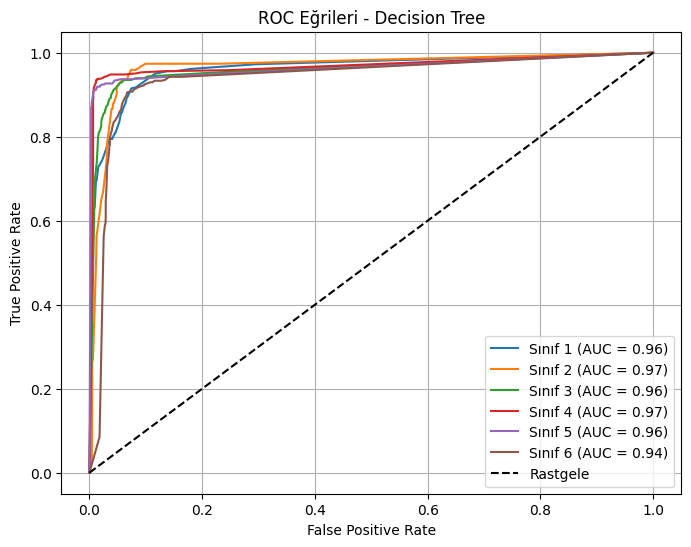

Random Forest | Outer Fold 1 Test Accuracy: 0.8836
Random Forest | Outer Fold 2 Test Accuracy: 0.8777
Random Forest | Outer Fold 3 Test Accuracy: 0.8891
Random Forest | Outer Fold 4 Test Accuracy: 0.8806
Random Forest | Outer Fold 5 Test Accuracy: 0.8795
Random Forest | Ortalama Accuracy: 0.8821 | Std: 0.0040
Random Forest | Ortalama Precision: 0.8788 | Std: 0.0044
Random Forest | Ortalama Recall: 0.8768 | Std: 0.0047
Random Forest | Ortalama F1 Score: 0.8769 | Std: 0.0044



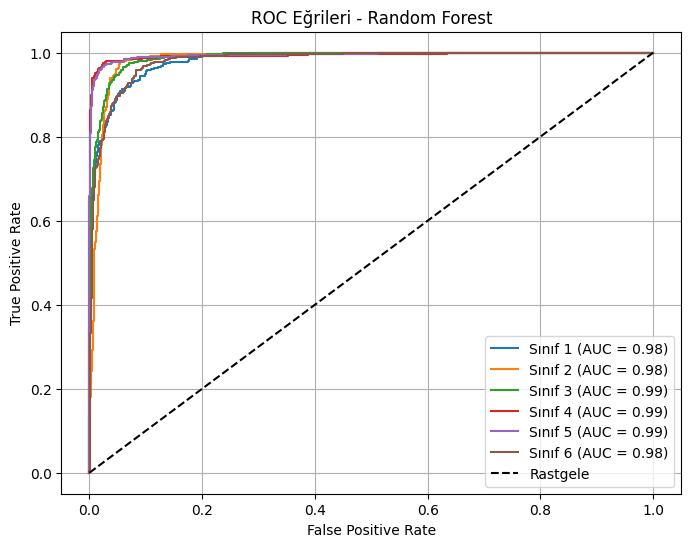

XGBoost | Outer Fold 1 Test Accuracy: 0.8828
XGBoost | Outer Fold 2 Test Accuracy: 0.8846
XGBoost | Outer Fold 3 Test Accuracy: 0.8788
XGBoost | Outer Fold 4 Test Accuracy: 0.8802
XGBoost | Outer Fold 5 Test Accuracy: 0.8927
XGBoost | Ortalama Accuracy: 0.8838 | Std: 0.0049
XGBoost | Ortalama Precision: 0.8810 | Std: 0.0043
XGBoost | Ortalama Recall: 0.8772 | Std: 0.0043
XGBoost | Ortalama F1 Score: 0.8782 | Std: 0.0040



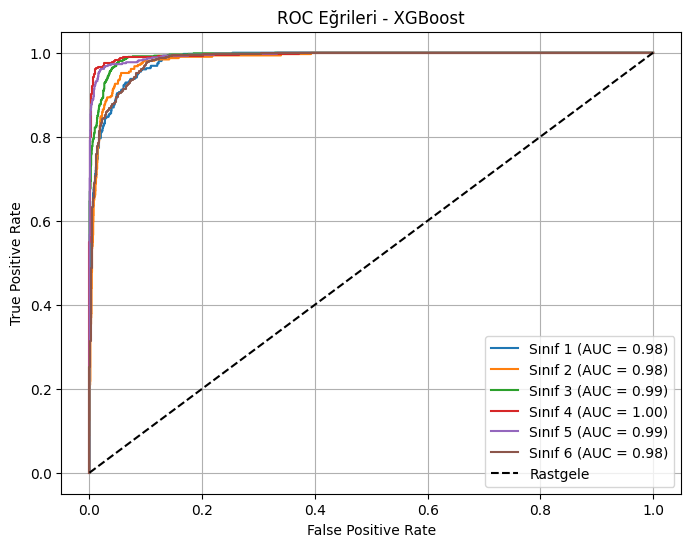

Naive Bayes | Outer Fold 1 Test Accuracy: 0.8476
Naive Bayes | Outer Fold 2 Test Accuracy: 0.8446
Naive Bayes | Outer Fold 3 Test Accuracy: 0.8527
Naive Bayes | Outer Fold 4 Test Accuracy: 0.8597
Naive Bayes | Outer Fold 5 Test Accuracy: 0.8622
Naive Bayes | Ortalama Accuracy: 0.8534 | Std: 0.0068
Naive Bayes | Ortalama Precision: 0.8469 | Std: 0.0063
Naive Bayes | Ortalama Recall: 0.8453 | Std: 0.0074
Naive Bayes | Ortalama F1 Score: 0.8422 | Std: 0.0075



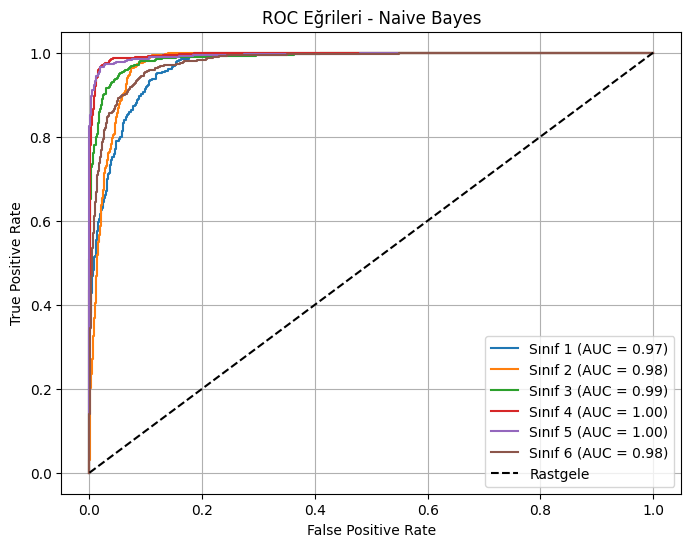


==== LDA Verisi ====
Logistic Regression | Outer Fold 1 Test Accuracy: 0.9170
Logistic Regression | Outer Fold 2 Test Accuracy: 0.9026
Logistic Regression | Outer Fold 3 Test Accuracy: 0.9162
Logistic Regression | Outer Fold 4 Test Accuracy: 0.9034
Logistic Regression | Outer Fold 5 Test Accuracy: 0.8968
Logistic Regression | Ortalama Accuracy: 0.9072 | Std: 0.0080
Logistic Regression | Ortalama Precision: 0.9091 | Std: 0.0069
Logistic Regression | Ortalama Recall: 0.9087 | Std: 0.0075
Logistic Regression | Ortalama F1 Score: 0.9087 | Std: 0.0071



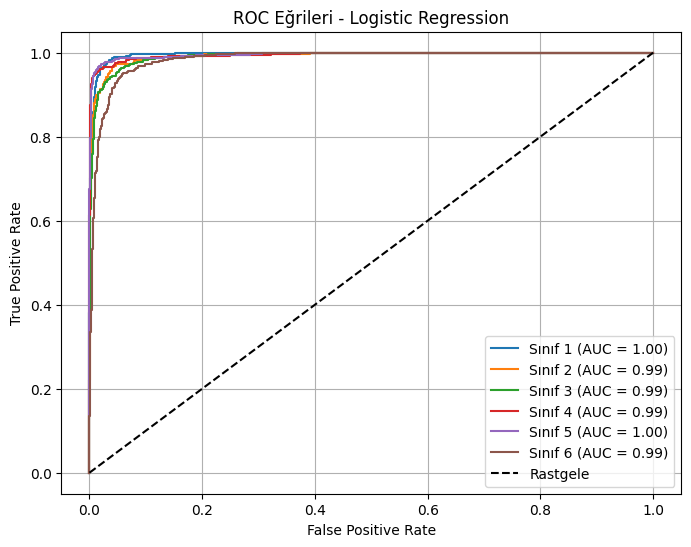

Decision Tree | Outer Fold 1 Test Accuracy: 0.8939
Decision Tree | Outer Fold 2 Test Accuracy: 0.9008
Decision Tree | Outer Fold 3 Test Accuracy: 0.8902
Decision Tree | Outer Fold 4 Test Accuracy: 0.8927
Decision Tree | Outer Fold 5 Test Accuracy: 0.8986
Decision Tree | Ortalama Accuracy: 0.8952 | Std: 0.0039
Decision Tree | Ortalama Precision: 0.9001 | Std: 0.0041
Decision Tree | Ortalama Recall: 0.8953 | Std: 0.0051
Decision Tree | Ortalama F1 Score: 0.8972 | Std: 0.0044



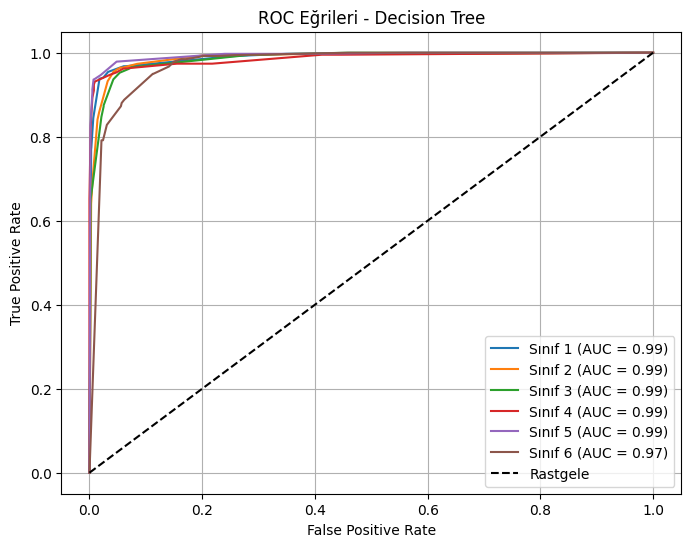

Random Forest | Outer Fold 1 Test Accuracy: 0.9122
Random Forest | Outer Fold 2 Test Accuracy: 0.9199
Random Forest | Outer Fold 3 Test Accuracy: 0.9074
Random Forest | Outer Fold 4 Test Accuracy: 0.9144
Random Forest | Outer Fold 5 Test Accuracy: 0.9140
Random Forest | Ortalama Accuracy: 0.9136 | Std: 0.0040
Random Forest | Ortalama Precision: 0.9179 | Std: 0.0040
Random Forest | Ortalama Recall: 0.9153 | Std: 0.0040
Random Forest | Ortalama F1 Score: 0.9164 | Std: 0.0039



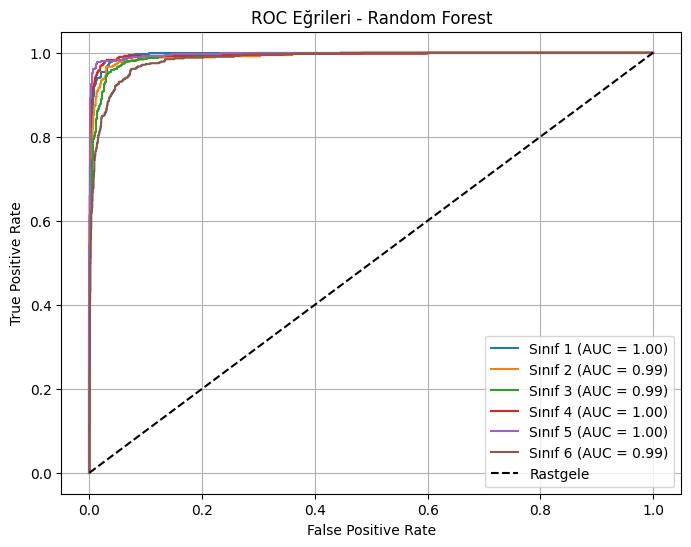

XGBoost | Outer Fold 1 Test Accuracy: 0.9148
XGBoost | Outer Fold 2 Test Accuracy: 0.9082
XGBoost | Outer Fold 3 Test Accuracy: 0.9107
XGBoost | Outer Fold 4 Test Accuracy: 0.9023
XGBoost | Outer Fold 5 Test Accuracy: 0.9247
XGBoost | Ortalama Accuracy: 0.9121 | Std: 0.0075
XGBoost | Ortalama Precision: 0.9154 | Std: 0.0069
XGBoost | Ortalama Recall: 0.9137 | Std: 0.0077
XGBoost | Ortalama F1 Score: 0.9143 | Std: 0.0073



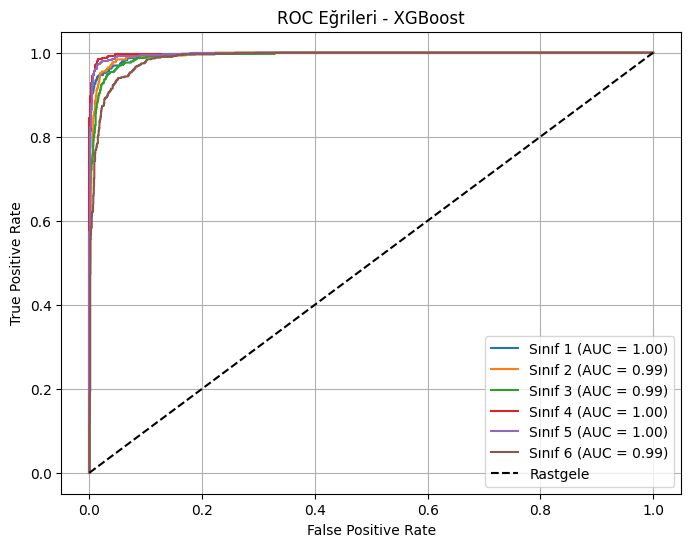

Naive Bayes | Outer Fold 1 Test Accuracy: 0.8854
Naive Bayes | Outer Fold 2 Test Accuracy: 0.9034
Naive Bayes | Outer Fold 3 Test Accuracy: 0.8905
Naive Bayes | Outer Fold 4 Test Accuracy: 0.8891
Naive Bayes | Outer Fold 5 Test Accuracy: 0.8857
Naive Bayes | Ortalama Accuracy: 0.8908 | Std: 0.0066
Naive Bayes | Ortalama Precision: 0.8896 | Std: 0.0069
Naive Bayes | Ortalama Recall: 0.8906 | Std: 0.0073
Naive Bayes | Ortalama F1 Score: 0.8890 | Std: 0.0071



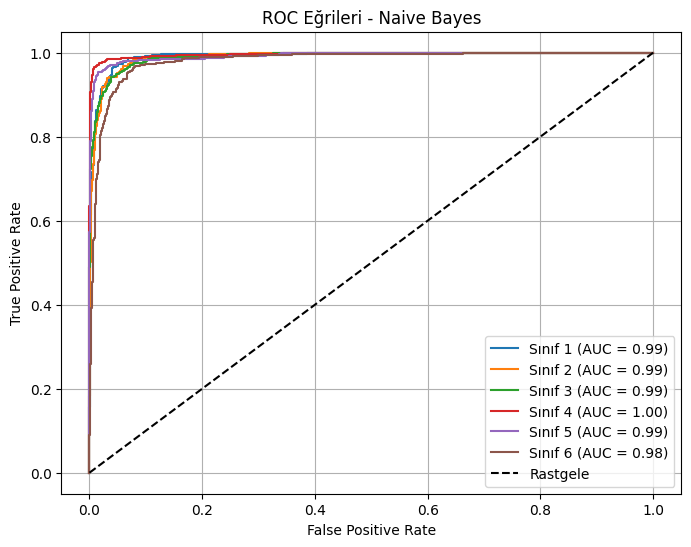

In [27]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# Ortak Nested CV fonksiyonu (ROC için en iyi dış fold'u da saklar)
def nested_cv(X_data, y_data, model_name, model, param_grid):
    outer_cv = KFold(n_splits=5, shuffle=True)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    best_model_for_roc = None
    best_X_test, best_y_test = None, None
    best_y_score = None
    best_auc = -1

    # XGBoost uyumluluğu için etiketleri 0'dan başlat
    y_data_adj = y_data - 1 if y_data.min() == 1 else y_data
    classes = np.unique(y_data_adj)
    n_classes = len(classes)

    for outer_fold, (train_val_idx, test_idx) in enumerate(outer_cv.split(X_data), 1):
        X_train_val, X_test = X_data[train_val_idx], X_data[test_idx]
        y_train_val, y_test = y_data_adj.iloc[train_val_idx], y_data_adj.iloc[test_idx]

        inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

        grid_search = GridSearchCV(estimator=model,
                                   param_grid=param_grid,
                                   cv=inner_cv,
                                   scoring='accuracy',
                                   n_jobs=-1)

        grid_search.fit(X_train_val, y_train_val)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Tahmin olasılıkları ROC için
        if hasattr(best_model, "predict_proba"):
            y_score = best_model.predict_proba(X_test)
        else:
            continue

        auc_score = roc_auc_score(label_binarize(y_test, classes=classes), y_score, average="macro", multi_class="ovr")
        if auc_score > best_auc:
            best_auc = auc_score
            best_model_for_roc = best_model
            best_X_test, best_y_test, best_y_score = X_test, y_test, y_score

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        metrics['f1'].append(f1_score(y_test, y_pred, average='macro', zero_division=0))

        print(f"{model_name} | Outer Fold {outer_fold} Test Accuracy: {metrics['accuracy'][-1]:.4f}")

    print(f"{model_name} | Ortalama Accuracy: {np.mean(metrics['accuracy']):.4f} | Std: {np.std(metrics['accuracy']):.4f}")
    print(f"{model_name} | Ortalama Precision: {np.mean(metrics['precision']):.4f} | Std: {np.std(metrics['precision']):.4f}")
    print(f"{model_name} | Ortalama Recall: {np.mean(metrics['recall']):.4f} | Std: {np.std(metrics['recall']):.4f}")
    print(f"{model_name} | Ortalama F1 Score: {np.mean(metrics['f1']):.4f} | Std: {np.std(metrics['f1']):.4f}\n")

    # ROC Eğrileri (OVA) - En iyi dış fold için
    if best_y_score is not None:
        y_test_bin = label_binarize(best_y_test, classes=classes)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], best_y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin[:, i], best_y_score[:, i])

        # ROC grafiği çizimi
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f"Sınıf {i+1} (AUC = {roc_auc[i]:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', label='Rastgele')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Eğrileri - {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()

# Kullanılacak modeller ve hiperparametre gridleri
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.01, 0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 10, None]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}),
    'XGBoost': (XGBClassifier(verbosity=0, use_label_encoder=False), {'n_estimators': [50, 100], 'max_depth': [3, 5, 7]}),
    'Naive Bayes': (GaussianNB(), {})
}

# Veri Temsilleri
data_versions = {
    'Ham Veri': X.values,
    'PCA Verisi': X_pca_final,
    'LDA Verisi': X_lda
}

# Her veri ve her model için Nested CV çalıştırma
for data_name, data in data_versions.items():
    print(f"\n==== {data_name} ====")
    for model_name, (model, param_grid) in models.items():
        nested_cv(data, y, model_name, model, param_grid)
